### Machine Learning: Classification
___

#### Summary:

Classification is a supervised learning problem in which the goal is to have an algorithm that can take in a new example and correctly classify it as one of K categories where K is a discrete finite number. There are many different algorithms that can be used to solve the classification problem. In this notebook we will apply some of these algorithms. We will not derive any of these algorithms ourselves but will instead use prebuilt functions from the sklearn library.
___
#### This notebook will include:
1. Logistic Regression
2. Naive Bayes
3. K-Nearest Neighbors
4. Support Vector Machine
5. Decision Tree Classification
6. Random Forest Classification
___
#### Reference: 

Much of what is in this notebook was learned from the Classification section of the Udemy course "Machine Learning: A-Z" by Kirill Eremenko. 

X_train: (42, 2)
X_test: (6, 2)
y_train: (42,)
y_test: (6,)


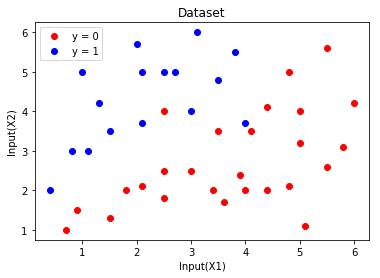

In [2]:
# Example Dataset
"""
The dataset that will be used for this notebook consists of 42 training examples and 6 test examples where
the input contains 2 features. Often inputs will have more features but for this example dataset we use 2 
because it is easier to visualize. There are only 2 classes for this dataset, which means that examples 
within the dataset can only take on 1 of 2 possible output values.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating the dataset
X_train = np.array([[0.4,2.0],[0.7,1.0],[0.8,3.0],[0.9,1.5],[1.0,5.0],[1.1,3.0],[1.3,4.2],[1.5,1.3],[1.5,3.5],
                    [1.8,2.0],[2.0,5.7],[2.1,2.1],[2.1,5.0],[2.1,3.7],[2.5,1.8],[2.5,2.5],[2.5,5.0],[2.5,4.0],
                    [2.7,5.0],[3.0,2.5],[3.0,4.0],[3.1,6.0],[3.4,2.0],[3.5,3.5],[3.5,4.8],[3.6,1.7],[3.8,5.5],
                    [3.9,2.4],[4.0,2.0],[4.0,3.7],[4.1,3.5],[4.4,2.0],[4.4,4.1],[4.8,2.1],[4.8,5.0],[5.0,3.2],
                    [5.0,4.0],[5.1,1.1],[5.5,2.6],[5.5,5.6],[5.8,3.1],[6.0,4.2]])
y_train = np.array([1,0,1,0,1,1,1,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
X_test = np.array([[2.3,3.7],[4.0,6.0],[1.0,3.5],[2.1,1.7],[3.0,2.1],[5.0,4.2]])
y_test = np.array([1,1,1,0,0,0])

# Printing the dataset shape
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

# Plotting the dataset
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'bo', label = 'y = 1')

plt.title('Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

Prediction on test set: [1 1 1 0 0 0]


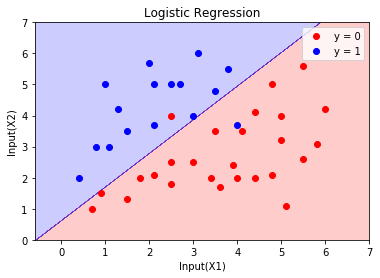

In [3]:
# Logistic Regression
"""
The Logistic Regression Model is similar to the linear regression model in that it takes in a weighted 
sum of the input features plus a bias. It is different in that it applies a nonlinearity (sigmoid 
function) to this weighted sum before calculating the loss, and the loss function is the logistic loss
instead of the mean-squared error loss.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating and fitting the logistic regression model to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)
print('Prediction on test set:', y_pred)

# Plotting the Logistic Regression boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
y_grid = classifier.predict(np.c_[X_grid_1.ravel(), X_grid_2.ravel()])

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), 
             alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('Logistic Regression')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


Prediction on test set: [1 1 1 0 0 0]


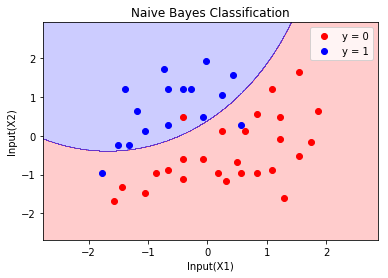

In [4]:
# Naive Bayes
"""
The Naive Bayes classifier uses rules of probability to predict which label to assign to a new example. 
Specifically, it uses Bayes Rule to predict an output label given a new example. It is important to 
note that the classifier assumes that the features of an example are independent.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing: Feature scaling and normalization
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Creating and fitting the Naive Bayes model to the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test_scaled)
print('Prediction on test set:', y_pred)

# Plotting the Naive Bayes classification boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train_scaled[y_train==0, 0], X_train_scaled[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train_scaled[y_train==1, 0], X_train_scaled[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train_scaled[:,0])-1, max(X_train_scaled[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train_scaled[:,1])-1, max(X_train_scaled[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
y_grid = classifier.predict(np.c_[X_grid_1.ravel(), X_grid_2.ravel()])

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), 
             alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('Naive Bayes Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

Prediction on test set: [1 1 1 0 0 0]


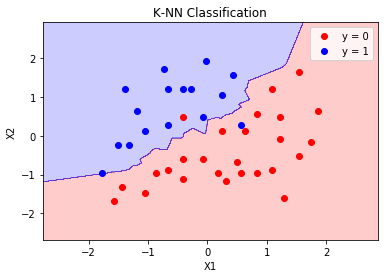

In [5]:
# K-Nearest Neighbor
"""
The K-Nearest Neighbor classifier is a relatively simple algorithm. For any new example, the classifier
finds the K nearest training examples to it. Of these K training examples, the classifier looks at 
their labels and then assigns the most common label among them to the new example. 
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing: Feature scaling and normalization
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Creating and fitting the K-NN model to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test_scaled)
print('Prediction on test set:', y_pred)

# Plotting the K-NN classification boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train_scaled[y_train==0, 0], X_train_scaled[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train_scaled[y_train==1, 0], X_train_scaled[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train_scaled[:,0])-1, max(X_train_scaled[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train_scaled[:,1])-1, max(X_train_scaled[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
y_grid = classifier.predict(np.c_[X_grid_1.ravel(), X_grid_2.ravel()])

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), 
             alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('K-NN Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


Prediction on test set: [1 1 1 0 0 0]


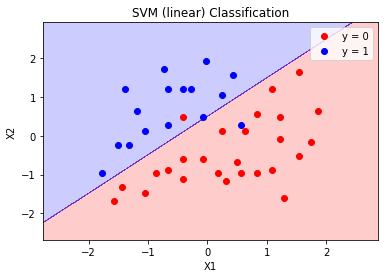

In [6]:
# Support Vector Machine w/ Linear Kernel
"""
The SVM model (with a linear kernel) is very similar to the logistic regression model, but instead
of minimizing the logistic loss to find the parameters, it minimizes the hinge loss. The hyperparameter
'C' is the regularization term. Increasing it will make the model fit to the training data well but may
cause overfitting.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing: Feature scaling and normalization
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Creating and fitting the SVM (linear) model to the training set
from sklearn.svm import SVC
classifier = SVC(C = 1, kernel = 'linear')
classifier.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test_scaled)
print('Prediction on test set:', y_pred)

# Plotting the SVM (linear) boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train_scaled[y_train==0, 0], X_train_scaled[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train_scaled[y_train==1, 0], X_train_scaled[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train_scaled[:,0])-1, max(X_train_scaled[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train_scaled[:,1])-1, max(X_train_scaled[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
y_grid = classifier.predict(np.c_[X_grid_1.ravel(), X_grid_2.ravel()])

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('SVM (linear) Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

Prediction on test set: [1 1 1 0 0 0]


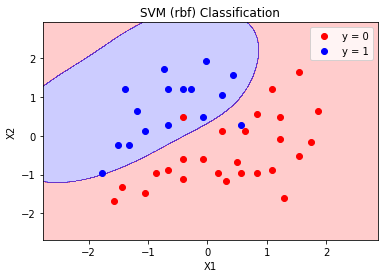

In [11]:
# Support Vector Machine w/ Gaussian Kernel
"""
The SVM model (with a Gaussian rbf kernel) takes all training examples into consideration when 
predicting the label for a new example; training examples that are closer to the new example are
given more weight than training examples further away. This difference in weight between closer and
further training examples can be controlled by the hyperparameter 'C'. 
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Preprocessing: Feature scaling and normalization
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Creating and fitting the SVM model to the training set
from sklearn.svm import SVC
classifier = SVC(C = 1, kernel = 'rbf')
classifier.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test_scaled)
print('Prediction on test set:', y_pred)

# Plotting the SVM (rbf) boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train_scaled[y_train==0, 0], X_train_scaled[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train_scaled[y_train==1, 0], X_train_scaled[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train_scaled[:,0])-1, max(X_train_scaled[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train_scaled[:,1])-1, max(X_train_scaled[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
y_grid = classifier.predict(np.c_[X_grid_1.ravel(), X_grid_2.ravel()])

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), 
             alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('SVM (rbf) Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

Prediction on test set: [1 1 1 0 0 0]


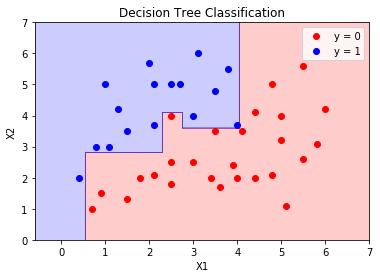

In [12]:
# Decision Tree Classification
"""
The Decision Tree Classification model separates the training set into sections that best split the 
data. Any new example must fall into one of these sections and its predicted label is set to be the 
label that is most common among the training examples within that section.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating and fitting the decision tree model to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)
print('Prediction on test set:', y_pred)

# Plotting the Decision Tree classification boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
y_grid = classifier.predict(np.c_[X_grid_1.ravel(), X_grid_2.ravel()])

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), 
             alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('Decision Tree Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

Prediction on test set: [1 1 1 0 0 0]


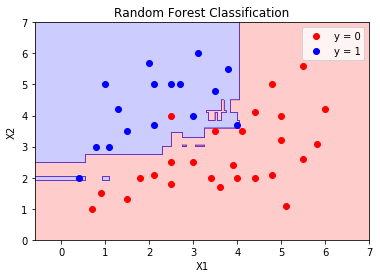

In [13]:
# Random Forest Classification
"""
The random forest classifier takes a random subset of the training examples and then performs the 
decision tree classifier on it. It does this many times, each with a different subset of training
examples. For any new example, there will be a label prediction for each one of these Decision 
Trees. The predicted label for the Random Forest Regression model is set to be the most common
label among the Decision Tree labels.
"""
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Creating and fitting the Random Forest model to the training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20) #n_estimators = number of trees
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)
print('Prediction on test set:', y_pred)

# Plotting the Random Forest classification boundary
from matplotlib.colors import ListedColormap
plt.plot(X_train[y_train==0, 0], X_train[y_train==0, 1], 'ro', label = 'y = 0')
plt.plot(X_train[y_train==1, 0], X_train[y_train==1, 1], 'bo', label = 'y = 1')
X_grid_1 = np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 1000)
X_grid_2 = np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 1000)
X_grid_1, X_grid_2 = np.meshgrid(X_grid_1, X_grid_2)
y_grid = classifier.predict(np.c_[X_grid_1.ravel(), X_grid_2.ravel()])

plt.contourf(X_grid_1, X_grid_2, y_grid.reshape(X_grid_1.shape), 
             alpha = 0.2, cmap = ListedColormap(('red', 'blue')))
plt.title('Random Forest Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()